In [1]:
using StatsBase
using Plots

In [2]:
function initialstate(L::Int)
    ρ = zeros(Int,L,L)
    ρ .+= 1
    return ρ
end

function strong_glauber(ρ::AbstractMatrix, β::Float64)
    L = size(ρ)[1]
    i, j = rand(1:L, 2)
    E = - ρ[i,j] * (ρ[i,mod1(j-1,L)] + ρ[i,mod1(j+1,L)] + ρ[mod1(i-1,L),j] + ρ[mod1(i+1,L),j])
    if E > 0
        ρ[i,j] *= -1
    else
        if rand() < exp(β * E)
            ρ[i,j] *= -1
        end
    end
    return ρ
end

function weak_glauber(ρ::AbstractMatrix, β::Float64, h::Float64)
    L = size(ρ)[1]
    i, j = rand(1:L, 2)
    E = - ρ[i,j] * (ρ[i,mod1(j-1,L)] + ρ[i,mod1(j+1,L)] + ρ[mod1(i-1,L),j] + ρ[mod1(i+1,L),j] + rand([h,-h]))
    if E > 0
        ρ[i,j] *= -1
    else
        if rand() < exp(β * E)
            ρ[i,j] *= -1
        end
    end
    return ρ
end

function magnetization(ρ::AbstractMatrix)
    return mean(ρ)
end

magnetization (generic function with 1 method)

In [25]:
function strongdynamics(L::Int, β::Float64, step::Int, samples::Int)
    T = L^5
    M1 = 0.0
    M2 = 0.0
    ρ = initialstate(L)
    for t in 1:T
        ρ = strong_glauber(ρ, β)
    end
    for t in 1:step*samples
        ρ = strong_glauber(ρ, β)
        if mod(t, step) == 0
            M = magnetization(ρ)
            M1 += M
            M2 += M^2
        end
    end
    return M1/samples, M2/samples
end

function weakdynamics(L::Int, β::Float64, h::Float64, step::Int, samples::Int)
    T = L^5
    M1 = 0.0
    M2 = 0.0
    ρ = initialstate(L)
    for t in 1:T
        ρ = weak_glauber(ρ, β, h)
    end
    for t in 1:step*samples
        ρ = weak_glauber(ρ, β)
        if mod(t, step) == 0
            M = magnetization(ρ)
            M1 += M
            M2 += M^2
        end
    end
    return M1/samples, M2/samples
end

weakdynamics (generic function with 1 method)

In [26]:
strongdata = Dict{Tuple{Int,Float64},NTuple{2,Float64}}()
weakdata = Dict{Tuple{Int,Float64,Float64},NTuple{2,Float64}}()

Dict{Tuple{Int64, Float64, Float64}, Tuple{Float64, Float64}}()

In [ ]:
samples = 10000
step = 1000

for L in 10:10:10
    for β in 0.5:0.1:1.5
        M1, M2 = strongdynamics(L,β,step,samples)
        strongdata[(L,β)] = (M1, M2)
    end
end

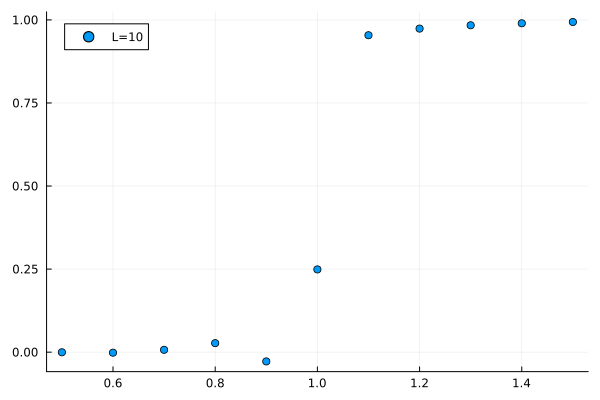

In [34]:
plt = plot()
for L in 10:10:10
    xs = 0.5:0.1:1.5
    ys = [strongdata[(L,β)][1] for β in xs]
    plt = plot!(plt, xs, ys, seriestype=:scatter, label="L=$L")
end
plt

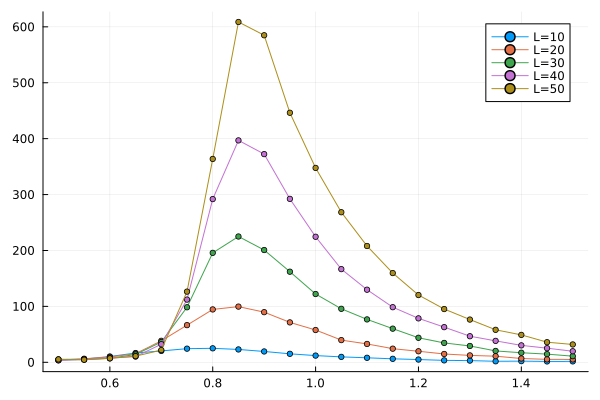

In [41]:
plt = plot()

ν = 1
γ = 1

for L in 10:10:50
    xs = 0.5:0.05:1.5
    ys = L^2*[strongdata[(L,β)][2]-strongdata[(L,β)][2]^2 for β in xs]

    # xs = (xs .- 0.145) #* L^(1/ν)
    # ys = ys * L^(-γ/ν)

    plt = plot!(plt, xs, ys, m=3, label="L=$L")
end
plt

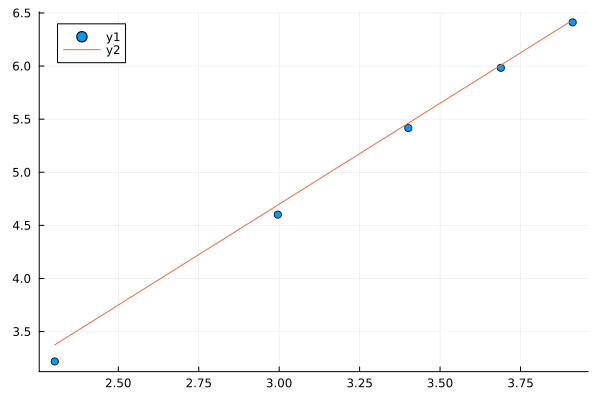

In [49]:
Ls = 10:10:50
ys = [max(L^2*[strongdata[(L,p)][2]-strongdata[(L,p)][2]^2 for p in 0.5:0.05:1.5]...) for L in Ls]

plot(log.(Ls), log.(ys), seriestype=:scatter)

f(x) = 1.9 * x - 01

xs = log(10):0.1:log(50)
ys = f.(xs)
plot!(xs, ys)

In [28]:
samples = 100

h = 1.0

for L in 10:10:50
    for β in 0.0:0.1:2.0
        M1 = 0.0
        M2 = 0.0
        for _ in 1:samples
            M = weakdynamics(L,β,h)
            M1 += M
            M2 += M^2
        end
        weakdata[(L,β,h)] = (M1/samples, M2/samples)
    end
end

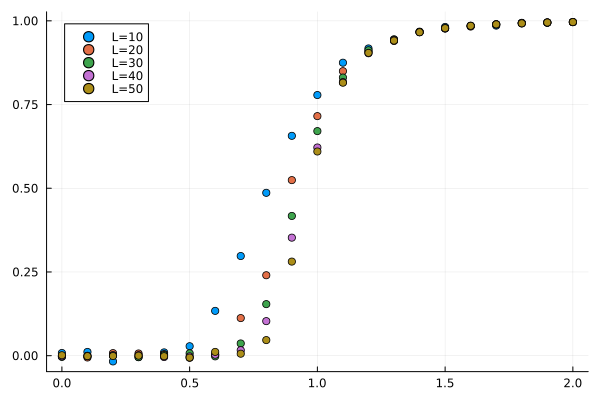

In [29]:
plt = plot()
h = 1.0
for L in 10:10:50
    xs = 0.0:0.1:2.0
    ys = [weakdata[(L,β,h)][1] for β in xs]
    plt = plot!(plt, xs, ys, seriestype=:scatter, label="L=$L")
end
plt

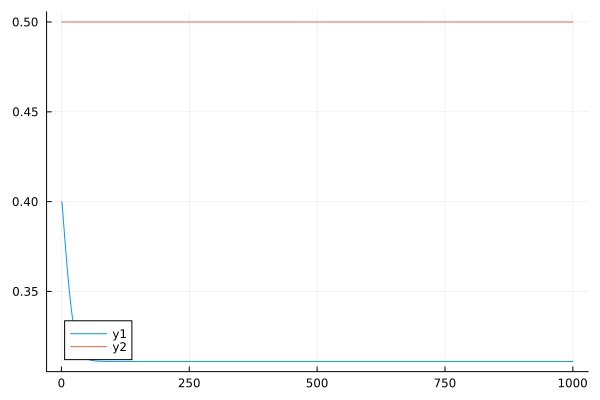

In [55]:
f(p0,p) = (1-p0)*(3p^2*(1-p)+p^3)+p0*((1-p)^3+3p*(1-p)^2)

p0 = 0.15
T = 1000
ps = zeros(T)
ps[1] = 0.4
for t in  2:T
    ps[t] = f(p0,ps[t-1])
end

plot(1:T, ps)
plot!(1:T, [0.5 for _ in 1:T])
